# Análise Exploratória

## responder a seguinte questão de pesquisa:

### "Existe alguma correlação entre as regiões definidas pelos ângulos alpha e delta de um corpo celeste e a sua emiss ̃ao luminosa, especificamente em relaço à faixa de cor observada?"

In [54]:
#!pip install -r ../requirements.txt

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('../data/star_classification_10_cartesian.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,class,redshift,x,y
0,1.237663e+18,15.342907,0.794882,18.74547,17.49025,16.89122,16.57350,0.713781,GALAXY,0.042002,-0.654218,0.250033
1,1.237664e+18,120.365538,55.660432,19.99985,19.68133,19.50156,19.17364,-0.775960,QSO,1.633797,0.348727,0.525619
2,1.237655e+18,245.610038,42.974786,23.11792,20.81292,18.88351,18.12335,-0.845505,GALAXY,0.454852,0.450750,0.286260
3,1.237660e+18,127.957356,6.647703,21.94454,21.01012,20.93496,20.93184,0.356499,QSO,2.608515,-0.618062,0.700648
4,1.237665e+18,159.174526,35.881846,18.89945,17.68422,17.02925,16.60000,-0.969780,GALAXY,0.083804,0.122096,-0.211234


### identificação das unidades de medida usadas

O alpha, também conhecido como ascensão reta, é o ângulo medido sobre o horizonte, no sentido horário (NLSO), com origem no Norte geográfico e extremidade no círculo vertical do astro. O azimute varia entre 0° e 360°.

Já o delta possui valores negativos, logo só pode se referir à declinação. A altura varia entre -90° e +90°. Podemos converter para distância polar para que varie entre 0° e 180°.

In [57]:
X = df[['alpha', 'delta', 'x','y','z', 'u', 'g', 'r', 'i', 'redshift']]

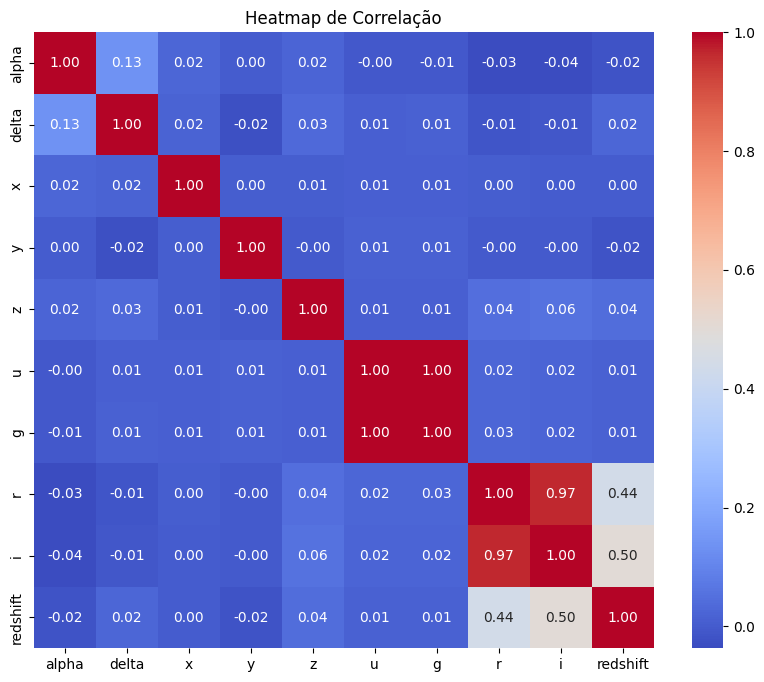

In [58]:
pearson_corr = X.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlação')
plt.show()

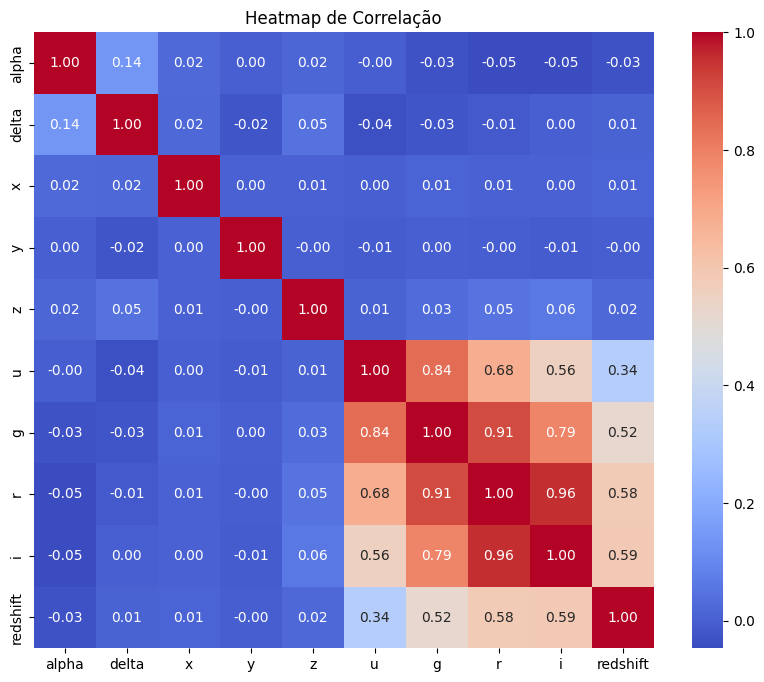

In [59]:
pearson_corr = X.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlação')
plt.show()

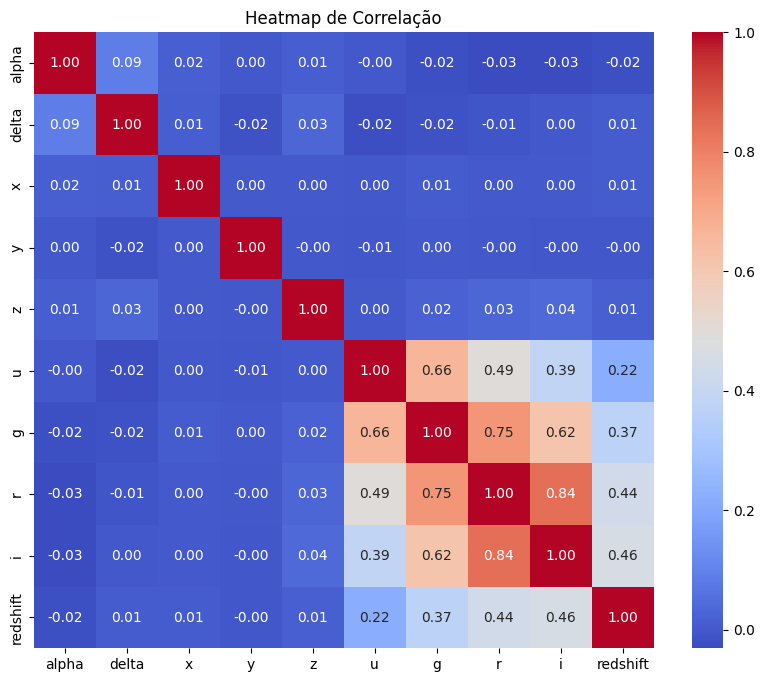

In [60]:
pearson_corr = X.corr(method='kendall')

plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlação')
plt.show()

# Conclusão